<a href="https://colab.research.google.com/github/Junoflows/DeepLearning_From_Scratch1/blob/main/chapter_7_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7 합성곱 신경망(CNN)

+ CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용된다.
+ 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 CNN을 기초로 한다.

## 7.1 전체 구조

+ CNN도 지금까지의 신경망과 같이 계층을 조합하여 만들 수 있고, __합성곱 계층__과 __풀링 계층__이 새롭게 등장한다.
+ 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다.
+ 이를 __완전 연결__이라고 하며, 완전히 연결된 계층을 __Affine 계층__이라는 이름으로 구현했다.
+ Affine 계층을 사용하면, 층이 5개인 완전연결 신경망은 다음과 같이 구현할 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1_WTO8oHrG2-2AX77o6RxQzx0DU9qNseE' width = 550 /><br>

+ 위와 같이 완전연결 신경망은 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층(또는 Sigmoid 계층)이 이어진다.
+ 위 그림에는 Affine-ReLU 조합이 4개가 쌓였고 마지막 5번째 층은 Affine 계층에 이어 소프트맥스 계층에서 최종 결과를 출력한다.

+ CNN의 구조를 살펴보자.

<img src='http://drive.google.com/uc?export=view&id=1qH6OS3IT-0glbP0FDzJvLfg7EdUjh7s3' width = 550 /><br>

+ CNN에서는 새로운 '합성곱 계층(Conv)'과 '풀링 계층(Pooling)'이 추가된다.
+ CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결된다. (풀링 계층은 생략되기도 한다.)
+ 이는 지금까지의 'Affine-ReLU' 연결이 'Conv-ReLU-(Pooling)'으로 바뀌었다고 생각할 수 있다.
+ CNN은 출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있다.
+ 마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용한다.

## 7.2 합성곱 계층

+ CNN에서는 __패딩__, __스트라이드__ 등 CNN 고유 용어가 등장한다.
+ 각 계층 사이에 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다.
+ CNN에서 사용하는 합성곱 계층의 구조를 살펴보자.

### 7.2.1 완전연결 계층의 문제점

+ 완전연결 신경망에서는 Affine 계층을 사용했다.  
이는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있었다.
+ 완전연결 신경망의 문제점은 데이터의 형상이 무시된다는 것이다.
+ 입력데이터가 이미지 데이터인 경우에 이미지는 가로, 세로, 채널(색상)으로 구성된 3차원 데이터이지만  
완전연결 계층에 입력할 때는 3차원 데이터를 1차원으로 평탄화해야한다.


MNIST 데이터셋을 사용할 때는 형상이 (1,28,28)인 이미지를 1줄로 세운 784개의 데이터를 첫 Affine 계층에 입력했다.

+ 이미지는 3차원 형상이며 여기에는 공간적 정보가 담겨있다.
+ 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 관련되어 있거나,  
거리가 먼 픽셀끼리는 관련이 없는 등 3차원 속에서 의미를 가지는 패턴이 숨어있을 것이다.
+ 완전연결 계층은 형상을 무시하고 모든 입력 데이터를 같은 차원의 뉴런으로 취급하여 위와 같은 정보를 살릴 수 없다.

+ 완전연결 계층과는 다르게 합성공 계층에서는 형상을 유지한다.
+ 이미지도 3차원 데이터로 입력받으며 다음 계층으로 3차원 데이터로 전달한다.
+ 즉 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 수 있다.

+ CNN에서는 합성곱 계층의 입출력 데이터를 __특징 맵__이라고도 한다.
+ 합성곱 계층의 입력 데이터를 __입력 특징 맵__, 출력 데이터를 __출력 특징 맵__ 이라고 한다.  
(입출력 데이터와 특징 맵을 같은 의미로 생각해도 무방하다.)

### 7.2.2 합성곱 연산

+ 합성곱 연산은 이미지 처리에서 말하는 __필터 연산__에 해당한다.

<img src='http://drive.google.com/uc?export=view&id=1TSjVKfhSO6H6FFl7Q-fjOqKJlJDK71N3' width = 550 /><br>

+ 위와 같이 합성곱 연산은 입력 데이터에 필터를 적용한다.
+ 이 예에서 입력 데이터와 필터는 가로, 세로 방향의 형상을 가지고, 입력은 (4,4), 필터는 (3,3), 출력은 (2,2)가 된다.  
(필터를 커널이라고도 한다.)
+ 합성곱 연산 예에서 계산이 이뤄지는 순서는 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1lLwfNejOIn-LeZpLFOW_g1tc7uHughf-' width = 550/><br>

+ 합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용하는데 원도우란 회색 3×3 부분을 말한다.
+ 입력과 필터에서 대응하는 원소끼리 곱한 후 총합을 구한고, 그 결과를 출력의 해당 장소에 저장한다.
+ 위 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다.

+ 완전연결 신경망에서는 가중치 매개변수와 편향이 존재하는데 CNN에서는 필터의 매개변수가 가중치에 해당한다.
+ CNN에 편향까지 포함하면 다음과 같은 흐름이 된다.

<img src='http://drive.google.com/uc?export=view&id=1Gu12Lv5dkG2JO5qGbL3MIm2-9W9ugggq' width = 550 /><br>

+ 편향은 항상 (1×1)로 필터를 적용한 후의 데이터 모든 원소에 더해진다.

### 7.2.3 패딩

+ 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0)으로 채우기도 하는데, 이를 __패딩__이라고 한다.
+ 예를 들어 아래 그림은 (4,4) 크기의 입력 데이터에 푹이 1인 패딩을 적용한 것이다.
+ 폭 1자리 패딩이라 하면 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것이다.

<img src='http://drive.google.com/uc?export=view&id=1XYs1LSvcGoyLwoww27h4b_G2t5bVSrxl' width = 550 /><br>

+ 처음에 크기가 (4,4)인 데이터에 패딩이 추가되어 (6,6)이 된다.
+ 위에서는 패딩을 1로 설정했지만 2나 3 등 원하는 정수로 설정할 수 있다.
+ 7-5 그림에 패딩을 2로 설정하면 입력 데이터의 크기는 (8,8)이 되고, 3으로 설정하면 (10,10)이 된다.

### 7.2.4 스트라이드


+ 필터를 적용하는 위치의 간격을 __스트라이드__라고 한다.
+ 지금까지의 예는 모두 스트라이드가 1이였지만 2로 설정하면 필터를 적용하는 윈도우가 두 칸씩 이동한다.

<img src='http://drive.google.com/uc?export=view&id=1nX6kCUHbteiVh_O_-UTqEpO0TwhIbPMa' width = 550 /><br>

+ 위 그림에서는 크기가 (7,7)인 입력 데이터에 스트라이드를 2로 설정한 필터를 적용한다.
+ 스트라이드를 2로 하니 출력은 (3,3)이 되는 것을 볼 수 있는데, 스트라이드를 키우면 출력 크기는 작아진다.
+ 반대로 패딩을 크게 하면 출력이 커진다.
+ 이 관계를 수식화하여 패딩, 스트라이드, 출력 크기를 어떻게 계산하는지 살펴보자.

입력 크기를 $(H, W)$, 필터 크기를 $(FH, FW)$, 출력 크기를 $(OH, OW)$, 패딩을 $P$, 스트라이드를 $S$라 하면 출력 쿠기는 다음 식으로 계산한다.

$\large OH = \frac{H + 2P - FH}{S}+1$ <br/>

$\large OW = \frac{W + 2P - FW}{S}+1$

+ 이 식을 사용하여 연습해보자.

<img src='http://drive.google.com/uc?export=view&id=18hipyAUmHUc2NU7FuXssJoMFQL_EDuKY' width = 550 /><br>

+ 위 식에 단순히 값을 대입하기만 하면 출력의 크기를 구할 수 있다.
+ 단 위 식의 $OH$, $OW$가 정수로 나눠떨어지는 값이어야 한다.
+ 출력의 크기가 정수가 아니면 오류를 내거나, 반올림하여 정수로 만드는 등의 방법으로 구현해야 한다.

### 7.2.5 3차원 데이터의 합성곱 연산

+ 2차원 형상의 합성곱을 살펴보았다. 하지만 이미지만 해도 가로, 세로, 채널 3차원 데이터이다.
+ 3차원 데이터를 다루는 합성곱 연산을 살펴보자.
+ 아래는 3차원 데이터의 합성곱 연산이다.

<img src='http://drive.google.com/uc?export=view&id=1y_gAj6jpa6jdfDSyT0F0qgJvwdCLxxAu' width = 550/><br>

+ 계산 순서는 다음과 같은데, 2차원일 때와 비교하면 채널 방향으로 특징 맵이 늘어났다.
+ 채널쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다  
수행하고 그 결과를 더해서 하나의 출력을 얻는다.

<img src='http://drive.google.com/uc?export=view&id=1PBfyrs2GPtXZerRUvh3n7poaro-c_IN7' width = 550/><br>

+ 3차원의 합성곱 연산에서 주의할 점은 입력 데이터와 패널의 채널 수가 같아야 한다는 것이다.
+ 필터 자체의 크기는 원하는 값으로 설정할 수 있고 모든 채널의 필터는 같은 크기여야 한다.
+ 이 예에서는 필터의 크기가 (3, 3)이지만, (2, 2)나 (1, 1), (5, 5) 등으로 설정해도 된다.

### 7.2.6 블록으로 생각하기

+ 3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 된다.
+ 3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순으로 쓴다.
+ 채널 수 $C$, 높이 $H$, 너비 $W$ 인 데이터의 형상은$(C, H, W)$로 쓴다.
+ 필터도 같은데 채널 수 $C$, 높이 $FH$, 너비 $FW$ 인 데이터의 형상은$(C, FH, FW)$로 쓴다.

<img src='http://drive.google.com/uc?export=view&id=1gnffzmF1OknNoI-xeVboJzk2SC3NxKrj' width = 550 /><br>

+ 이 예에서 출력 데이터는 한 장의 특징 맵이다. 즉 채널이 1개인 특징 맵이다.
+ 합성곱 연산의 출력으로 다수의 채널을 내보내는 방법으로는 필터를 다수 사용하는 것이다.

<img src='http://drive.google.com/uc?export=view&id=1Z_bP9AlRlVnCR6xtYXqvFvhmkY2qt3vE' width = 550 /><br>

+ 이 그림과 같이 필터를 $FN$개 적용하면 출력 맵도 $FN$개가 생성된다.
+ 이 $FN$개 맵을 모으면 형상이 $(FN, OH, OW)$인 블록이 완성된다.
+ 이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름이다.

+ 합성곱 연산에서는 필터의 수도 고려해야 한다.
+ 즉 필터의 가중치 데이터는 4차원 데이터이며(출력 채널 수, 입력 채널 수, 높이, 너비) 순으로 쓴다.
+ 예를 들어 채널 수3, 크기 5×5인 필터가 20개 있다면 (20, 3, 5, 5)로 쓴다.
+ 합성곱 연산에도 완전연결 계층처럼 편향이 쓰이는데 다음은 편향까지 고려한 모습이다.

<img src='http://drive.google.com/uc?export=view&id=1AyQOlSCYfxuFQdCAJ4u1lYt_ibtvaTnX' width = 550 /><br>

+ 편향은 채널 하나에 값 하나씩으로 구성된다.
+ 위 예에서 편향의 형상은 $(FN, 1, 1)$이고, 펼터의 출력 결과의 형상은 $(FN, OH, OW)$이다.
+ 두 블록을 더하면 편향의 각 값이 필터의 출력인 $(FN, OH, OW)$ 블록의 대응 채널의 원소 모두에 더해진다.
+ 형상이 다른 블록의 덧셈은 넘파이의 브로드캐스트 기능으로 쉽게 구현할 수 있다.


### 7.2.7 배치 처리

+ 신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리했다.
+ 완전연결 신경망 구현에서는 이 방식을 지원하여 치리 효율을 높이고, 미니배치 방식의 학습도 지원했다.
+ 합성곱 연산도 배치 처리를 지원하고자 하는데 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장한다.
+ 데이터를 (데이터 수, 채널 수, 높이, 너비) 순으로 저장하고, 데이터가 N개일 때 배치 처리를 하면 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1aJwDsZAJyQGh1xRI6oUI214OtuB9mzG5' width = 550 /><br>

+ 위 그림을 보면 각 데이터의 선두에 배치용 차원을 추가했는데 이처럼 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐른다.
+ 주의할 점은 신경망에 4차원 데이터가 하나 흐를 때마다 N개에 대한 합성곱 연산이 이뤄진다는 것이다.
+ 즉 N회 분의 처리를 한 번에 수행하는 것이다.

## 7.3 풀링 계층

+ 풀링은 가로 세로 방향의 공간을 줄이는 연산이다.
+ 다음 예는 2×2 영역을 원소 하나로 집약하여 공간의 크기를 줄인다.

<img src='http://drive.google.com/uc?export=view&id=1AMGHCvC-2CFeqZn0CqWqCMfqq8lIexD9' width = 550/><br>

+ 위 그림은 2×2 __최대 풀링__을 스트라이드 2로 처리하는 순서이다.
+ 최대 풀링은 최댓값을 구하는 연산으로 '2×2'는 대상 영역의 크기를 뜻한다.
+ 즉 2×2 최대 풀링은 2×2 크기의 영역에서 가장 큰 원소 하나를 꺼낸다.
+ 스트라이드는 2로 설정했으므로 2×2 윈도우가 웟노 2칸 간격으로 이동한다.
+ 일반적으로 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정한다.

### 7.3.1 풀링 계층의 특징

__학습해야 할 매개변수가 없다__
> 풀링 계층 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 합성곱 계층과 달리 학습해야 할 매개변수가 없다. <br/>

__채널 수가 변하지 않는다__
> 풀링 연산은 채널마다 독립적으로 계산하기 때문에 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다.

<img src='http://drive.google.com/uc?export=view&id=1qQIKnsjXQImVEq5BvlDvwf3uVZhiaiNN' width = 550/><br>

__입력의 변화에 영향을 적게 받는다(강건하다)__
> 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다.  
> 아래 예는 입력 데이터의 차이를 풀링이 흡수해 사라지게 하는 모습을 보여준다.

<img src='http://drive.google.com/uc?export=view&id=1Ap_Wq5CxTqdb8bGvpSioF3d9YKyfBL2S' width = 550/><br>

## 7.4 합성곱/풀링 계층 구현하기

+ 합성곱 계층과 풀링 계층을 파이썬으로 구현해보자.
+ 오차역전파법에서와 같이 forward와 backward 메서드를 추가하여 모듈로 이용한다.
+ 복잡해 보이지만 트릭을 사용하여 쉽게 구현할 수 있는데, 트릭으로 문제를 간단히 하면서 구현해보자.

### 7.4.1 4차원 배열

+ CNN에서 계층 사이를 흐르는 데이터는 4차원이다.
+ 예를 들어 데이터의 형상이 (10, 1, 28, 28)이면, 높이 28, 너비 28, 채널 1개인 데이터가 10개인 것이다.

In [ ]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

+ 첫 번째 데이터에 접근하려면 x[0]이라고 쓰고 마찬가지로 두 번째 데이터는 x[1] 위치에 있다.

In [ ]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


+ 첫 번째 데이터의 첫 채널의 공간 데이터에 접근하려면 다음과 같이 적는다.

In [ ]:
x[0,0]

array([[0.09343141, 0.51190193, 0.15219311, 0.11062916, 0.02523548,
        0.07989381, 0.83275878, 0.59151531, 0.83071535, 0.28578034,
        0.61223078, 0.14402435, 0.78840656, 0.73539505, 0.92902167,
        0.70027744, 0.94754291, 0.27490418, 0.91138947, 0.56490294,
        0.56253006, 0.09983982, 0.26368652, 0.7744408 , 0.14981987,
        0.23599452, 0.35062   , 0.18724918],
       [0.8958629 , 0.08234962, 0.99046136, 0.05670391, 0.00515302,
        0.56533192, 0.9083201 , 0.76089258, 0.71113001, 0.82750056,
        0.14434971, 0.52159395, 0.23106768, 0.86776997, 0.19866956,
        0.68667447, 0.15612335, 0.97831695, 0.79498438, 0.79116252,
        0.02027393, 0.98603394, 0.6548563 , 0.01995144, 0.52386771,
        0.8313716 , 0.15248322, 0.3375214 ],
       [0.76968261, 0.58888228, 0.50675021, 0.68858018, 0.59469768,
        0.61931724, 0.20568885, 0.72768178, 0.19649778, 0.04767753,
        0.1704997 , 0.31454413, 0.77030929, 0.01207481, 0.1256719 ,
        0.7970853 , 0.6125

+ 이처럼 CNN은 4차원 데이터를 다루는데 합성곱 연산의 구현이 복잡해보이지만 'im2col' 이라는 '트릭'이 문제를 단순하게 만들어준다.

### 7.4.2 im2col로 데이터 전개하기

+ 합성곱 연산을 구현하려면 for 문을 겹겹히 써야된다고 생각할 수 있다.
+ 이는 귀찮고 넘파이의 성능이 떨어진다는 단점이 있다.
+ for 문 대신 __im2col__이라는 편의 함수를 사용하여 간단하게 구현해보자.

+ im2col은 입력 데이터를 필터링하기 좋게 전개하는 함수이다.
+ 아래 그림처럼 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀐다.
+ 정확히는 배치 안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환한다.

<img src='http://drive.google.com/uc?export=view&id=1F1lHFJ0AGLMJ5BkWJUf-YJdNFJfeT7yx' width = 550 /><br>

+ im2col은 필터링하기 좋게 입력 데이터를 전개한다.
+ 아래 그림처럼 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓고  
이 전개를 필터를 적용하는 모든 영역에서 수행하는 게 im2col이다.

<img src='http://drive.google.com/uc?export=view&id=10MP9vkjneE5PADJNQGlchgWBijjDsK-s'  width = 550/><br>

+ 위 그림에서는 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분이다.
+ 필터 적용 영역이 겹치면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아진다.
+ 즉 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있다.



+ 하지만 컴퓨터는 큰 행렬을 묶어 계산하는데 탁월하기에  
문제를 행렬 계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있다.

__NOTE__
> im2col은 'image to column' 즉 이미지에서 행렬로 라는 뜻이다.  
카페와 체이너 등의 딥러닝 프레임워크는 im2col이라는 이름의 함수를 만들어  
합성곱 계층을 구현할 때 이용하고 있다.

+ im2col로 입력 데이터를 전개한 다음에 합성곱 계층의 필터를 1열로 전개하고, 두 행렬의 곱을 계싼하면 된다.
+ 이는 완전연결 계층의 Affine 계층에서 한 것과 거의 같다.

<img src='http://drive.google.com/uc?export=view&id=1KOxt_TKeEnSbrhFkj5rdCei6L2NPv7Ax' width = 550/><br>

+ 이와 같이 im2col 방식으로 출력한 결과는 2차원 행렬이다.
+ CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형한다.

### 7.4.3 합성곱 계층 구현하기

+ im2col 함수를 미리 만들어 제공한다. im2col 함수의 인터페이스는 다음과 같다.

>im2col(input_data, filter_h, filter_w, stride = 1, pad = 0)
+ input_data - (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이뤄진 입력 데이터
+ filter_h - 필터의 높이
+ filter_w - 필터의 너비
+ stride - 스트라이드
+ pad - 패딩


+ im2col은 필터 크기, 스트라이드, 패딩을 고려하여 입력 데이터를 2차원 배열로 전개한다.
+ im2col을 사용해보자.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys, os
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride = 1, pad = 0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride = 1, pad = 0)
print(col2.shape)

(9, 75)
(90, 75)


+ 첫 번째는 배치 크기가 1(데이터 1개), 채널은 3개, 높이·너미가 7×7의 데이터이고 두 번째는 배치 크기만 10이고 나머지는 첫 번째와 같다.
+ im2col 함수를 적용한 두 경우 모두 2번째 차원의 원소는 75개이다.
+ 이 값은 필터의 원소 수와 같다(채널 3개, 5×5 데이터).
+ 배치 크기가 1일 때는 결과의 크기가 (9, 75)이고 10일 때는 10배인 (90, 75) 크기의 데이터가 저장된다.

+ im2col을 사용하여 합성곱 계층을 구현해보자. 합성곱 계층을 Convolution이라는 클래스로 구현한다.

In [ ]:
class Convoluion:
  def __init__(self, W, b, stride = 1, pad = 0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
    out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
    ###
    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T
    out = np.dot(col, col_W) + self.b
    ###
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out

+ 합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화한다.
+ 필터는 (FN, C, FH, FW)의 4차원 형상이다. 순서대로 필터 개수, 채널, 필터 높이, 필터 너비를 의미한다.
+ 입력 데이터를 im2col로 전개하고 필터도 reshape으로 2차원 배열로 전개한 후, 두 행렬의 곱을 구한다.
+ 필터를 전개하는 부분은 각 필터 블록을 1줄로 펼쳐 세운다
+ 이때 reshape의 두 번째 인수를 -1로 지정했는데 이는 reshape이 제공하는 편의 기능으로  
 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다.

+ 예를 들어 (10, 3, 5, 5) 형상의 다차원 배열 W의 언소 수는 750개인데  
reshape(10, -1)을 호출하면 750개 원소를 10묶음으로 (10, 75)인 배열로 만들어준다.

+ forward 구현의 마지막에서는 출력 데이터를 적절한 형상으로 바꿔준다.
+ 이때 transpose 함수를 사용하는데 이는 다차원 배열의 축 순서를 바꿔주는 함수이다.
+ 다음과 같이 인덱스를 지정하여 축의 순서를 변경한다.

<img src='http://drive.google.com/uc?export=view&id=1ksgObapRQ_ece2NvAV_mxVsjYF_zSCeg' width = 550 /><br>

+ 이상 합성곱 계층의 forward 구현으로 im2col로 전개하여 Affine 계층과 거의 똑같이 구현할 수 있다.
+ 합성곱 계층의 역전파는 Affine 계층의 구현과 공통점이 많아 따로 설명하지는 않는다.
+ 주의할 점은 합성곱 계층의 역전파에서 im2col을 역으로 처리해야 하는데  
이는 col2im 함수를 사용하면 된다.

### 7.4.4 풀링 계층 구현하기

+ 풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개한다.
+ 아래 그림처럼 풀링 적용 영역을 채널마다 독립적으로 전개한다는 점에서 합성곱 계층 때와 다르다.

<img src='http://drive.google.com/uc?export=view&id=1uJOjemWw6_77ZUlujYhv3L6sDZLNGVq3' width = 550 /><br>

+ 이렇게 전개한 후, 전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 바꿔주면 된다.

<img src='http://drive.google.com/uc?export=view&id=1OmIQr94u560wNvAJiQMytH3l-M76bOY8' width = 550 /><br>

+ 이상이 풀링 계층의 forward 처리 흐름이다. 이를 파이썬으로 구현해보자.

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride = 1, pad = 0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.poll_h) / self.stride)
    out_w = int(1 + (W - self.poll_w) / self.stride)

    # 전개(1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)

    # 최댓값(2)
    out = np.max(col, axis = 1)

    # 성형(3)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

+ 풀링 계층의 구현은 다음과 같이 3단계로 진행한다.
> 1. 입력 데이터를 전개한다.
> 2. 행별 최댓값을 구한다.
> 3. 적절한 모양으로 성형한다.

+ 앞의 코드에서와 같이 각 단계는 한두 줄 정도로 간단히 구현된다.

__NOTE__ <br/>
최댓값 계산에는 np.max 메서드를 사용할 수 있다. np.max는 인수로 축(axis)을 지정할 수 있는데  
이 인수로 지정한 축마다 최댓값을 구할 수 있다.  
np.max(x, axis=1)은 입력 x의 1번째 차원의 축마다 최댓값을 구한다.

## 7.5 CNN 구현하기

+ 합성곱 계층과 풀링 계층을 구현했으니 이 계층들을 조합하여 손글씨 숫자를 인식하는 CNN을 구현해보자.

<img src='http://drive.google.com/uc?export=view&id=1wAYQs0P9xwKPl8anX_eZms5YejTbPhml' width = 550
/><br>

+ 위 CNN 네트워크는 'Convolution-ReLU-Pooling_Affine-ReLU-Affine-Softmax' 순으로 흐른다.
+ 이를 SimpleConvNet이라는 이름의 클래스로 구현한다.
+ SimpleConvNet의 초기화(__init__)를 살펴보자.

__초기화 때 받는 인수__
+ input_dim - 입력 데이터(채널 수, 높이, 너비)의 차원
+ conv_param - 합성곱 계층의 하이퍼파라미터(딕셔너리). 딕셔너리의 키는 다음과 같다.
> filter_num - 필터 수  
filter_size - 필터 크기  
stride - 스트라이드  
pad - 패딩  
+ hidden_size - 은닉층(완전연결)의 뉴런 수
+ output_szie - 출력층(완전연결)의 뉴런 수
+ weight_init_std - 초기화 때의 가중치 표준편차

+ 합성곱 계층의 하아피퍼라미터는 딕셔너리 형태로 주어진다(conv_param)
+ 이는 필요한 하이퍼파라미터의 값이  
{'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1} 처럼 저장된다는 뜻이다.

In [ ]:
class SimpleConvNet:
      def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                          conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

      def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

      def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

      def gradient(self, x, t):
      # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

+ SimpleConvNet의 초기화는 코드가 길어서 세 부분으로 나눠 설명한다. 다음은 그 중 첫 번째이다.

```
class SimpleConvNet:
      def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
```

+ 초기화 인수로 주어진 합성곱 계층의 하이퍼파라미터를 딕셔너리에서 꺼낸다.
+ 그 후 합성곱 계층의 출력 크기를 계산한다.

+ 다음 코드는 가중치 매개변수를 초기화하는 부분이다.
```
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
```

+ 학습에 필요한 매개변수는 1번째 층의 합성곱 계층과 나머지 두 완전연결 계층의 가중치와 편향이다.
+ 이 매개변수들을 인스턴스 변수 params 딕셔너리에 저장한다.
+ 1번째 층의 합성곱 계층의 가중치를 W1, 편향을 b1이라는 키로 지정한다.
+ 마찬가지로 2번쨰 층의 완전연결 계층의 가중치와 편향을 W2, b2,  
마지막 3번째 층의 완전연결 계층의 가중치와편향을 W3, b3라는 키로 각각 저장한다.

+ 마지막으로 CNN을 구성하는 계층들을 생성한다.
```
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()
```

+ 순서가 있는 딕셔너리(orderedDict)인 layers에 계층들을 차례로 추가한다.
+ 마지막 SoftmaxWithLoss 계층만큼은 last_layer라는 별도 변수에 저장해둔다.
+ 이상이 SimpleConvNet의 초기화이다.

+ 이 후 추론을 수행하는 predict 메서드와 손실 함수의 값을 구하는 loss 메서드를 다음과 같이 구현한다.
```
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
```

+ 인수 x는 입력 데이터, t는 정답 레이블이다.
+ predict 메서드는 초기화 때 layers에 추가한 계층을 맨 앞부터 차례로 forward 메서드를 호출하며  
그 결과를 다음 계층에 전달한다.
+ loss 메서드는 predict 메서드의 결과를 인수로 마지막 층의 forward 메서드를 호출한다.
+ 즉 첫 계층부터 마지막 계층까지 forward를 처리한다.

+ 오차역전파법으로 기울기를 구하는 구현은 다음과 같다.
```
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
```

+ 매개변수의 기울기는 오차역전파법으로 구한다. 이 과정은 순전파와 역전파를 반복한다.
+ 지금까지 각 계층의 순전파와 역전파 기능을 구현한 것을 적절한 순서로 호출하면 된다.
+ 마지막으로 grads 라는 딕셔너리 변수에 각 가중치 매개변수의 기울기를 저장한다.

+ 이 SimpleConvNet으로 MNIST 데이터셋을 학습해보자.

train loss:2.299868108283997
=== epoch:1, train acc:0.1, test acc:0.094 ===
train loss:2.2975427873120347
train loss:2.2936226027385826
train loss:2.2865980894505125
train loss:2.2806804764291275
train loss:2.264792333992268
train loss:2.248452645388653
train loss:2.2288187549924814
train loss:2.207505232615164
train loss:2.1797330073081986
train loss:2.149095658843682
train loss:2.0843182961733007
train loss:2.0128768528823313
train loss:1.977657081899893
train loss:1.8529378345018426
train loss:1.8489918115398467
train loss:1.7496426598977834
train loss:1.676484968732113
train loss:1.6860743294444933
train loss:1.537357123500527
train loss:1.4285717741023356
train loss:1.3617479888478483
train loss:1.310621623613755
train loss:1.2909926741092845
train loss:1.2069837948747442
train loss:1.0385145875223636
train loss:1.1606587594807922
train loss:0.985056182500618
train loss:0.8582292292367952
train loss:0.8683125259410742
train loss:0.8098039523028234
train loss:0.7480469216859761
tra

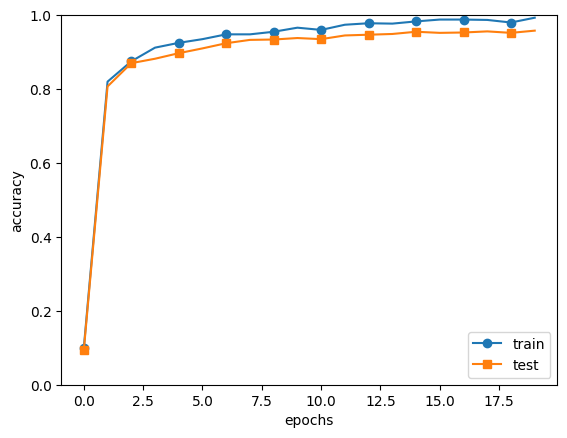

In [ ]:
# coding: utf-8
import sys, os
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from ch07.simple_convnet import SimpleConvNet
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

+ SimpleConvNet을 MNSIT 데이터셋으로 학습하면 훈련 데이터에 대한 정확도는 99.3%,  
시험 데이터에 대한 정확도는 95.6%가 된다.(학습마다 정확도에 약간의 오차가 존재함)
+ 시험 데이터에 대한 정확도가 95%라는 것은 비교적 작은 네트워크로서는 아주 높다고 할수 있다.

## 7.6 CNN 시각화하기

+ CNN을 구성하는 합성곱 계층은 입력으로 받은 이미지 데이터에서 무엇을 보고있는 걸까?
+ 합성곱 계층을 시각화해서 CNN이 보고 있는 것이 무엇인지 알아보자.

### 7.6.1 1번째 층의 가중치 시각화하기

+ MNIST 데이터셋으로 간단한 CNN 학습을 하였는데  
1번째 층의 합성곱 계층의 가중치 형상은 (30, 1, 5, 5)였다(필터 30개, 채널 1개, 5×5크기).
+ 필터 크기가 5×5, 채널이 1개라는 것은 이 필터를 1채널의 회색조 이미지로 시각화할 수 있다는 것이다.
+ 이 합성곱 계층 필터를 이미지로 나타내보자.

무작위(랜덤) 초기화 후의 가중치 



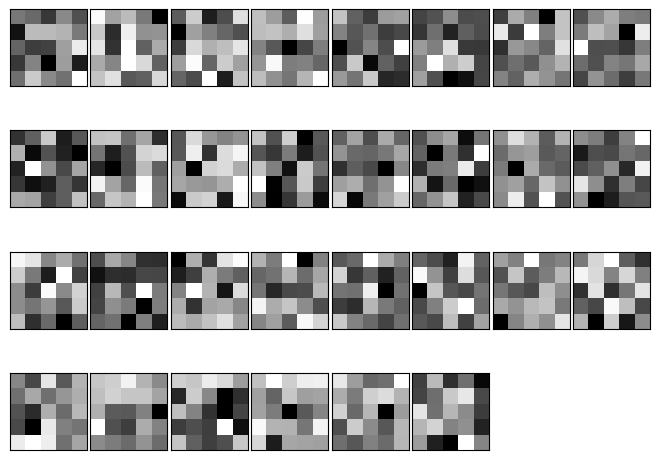

학습된 가중치



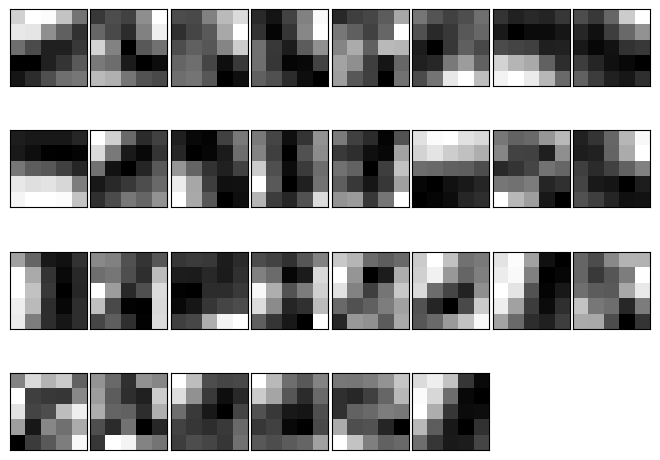

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
print("무작위(랜덤) 초기화 후의 가중치 \n")
filter_show(network.params['W1'])

print('학습된 가중치\n')
network.load_params("params.pkl")
filter_show(network.params['W1'])

<img src='http://drive.google.com/uc?export=view&id=1rvJ9QAt8813sYS6_y5v089YdDVbBcmeC' width = 550/><br>

+ 위와 같이 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없다.
+ 한편 학습을 마친 필터는 규칙성 있는 이미지가 되었다.
+ 흰색에서 검은색으로 점차 변화하는 필터와 덩어리(블롭)가 진 필터 등, 규칙을 띄는 필터로 바뀌었다.

+ 오른쪽 그림같이 규칭성 있는 필터는 무엇을 보고있는 것일까?
+ 에지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역) 등을 보고 있다.
+ 왼쪽 절반이 흰색이고 오른쪽 절반이 검은색일 필터는 세로 방향의 에지에 반응하는 필터이다.

<img src='http://drive.google.com/uc?export=view&id=1ny_9NbsNOooMNpK3RFDsVdS_5YTtrQjg' width = 550 /><br>

+ 위 그림은 학습된 필터 2개를 선택하여 입력 이미지에 합성곱 처리를 한 결과이다.
+ '필터 1'은 세로 에지에 반응하며 '필터 2'는 가로 에지에 반응하는 것을 알 수 있다.
+ 이처럼 합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보를 추출할 수 있다.  
이러한 정보가 뒷 계층에 전달된다는 것이 앞서 구현한 CNN이다.

### 7.6.2 층 깊이에 따른 추출 정보 변화

+ 1번째 층의 합성곱 계층에서는 에지나 블롭 등의 저수준 정보고 추출된다면,  
겹겹이 쌓인 CNN의 각 계층에서는 어떤 정보가 추출될까?
+ 딥러닝 시각화에 관한 연구에 따르면 계층이 깊어질수록 추출되는 정보는 더 추상화되는 것을 알 수 있다.

+ 아래 그림은 일반 사물 인식을 수행한 8층 CNN이다.
+ 이 네트워크 구조는 AlexNet이라 한다.
+ 합성곱 계층과 풀링 계층을 여러 겹 쌓고 마지막으로 완전연결 계층을 거쳐 결과를 출력하는 구조이다.
+ 아래 그림에서 블록으로 나타낸 것은 중간 데이터이며, 그 중간 데이터에 합성곱 연산을 연속해서 적용한다.

<img src='http://drive.google.com/uc?export=view&id=13ddI2fGUpO7gYvYjGKc88SKp1HfEtb2W' width = 550/><br>

+ 딥러닝의 흥미로운 점은 합성곱 계층을 여러 겹 쌓으면 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다는 것이다.
+ 처음 층은 단순한 에지에 반응하고 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화한다.
+ 즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 고급정보로 변화해가는데 사물의 의미를 이해하도록 변화하는 것이다.

## 7.7 대표적인 CNN

+ CNN 네트워크의 구성은 다양한데 그 중 중요한 두 가지를 알아보자.
+ 하나는 CNN의 원조인 LeNet이고 다른 하나는 딥러닝이 주목받도록 이끈 AlexNet이다.

### 7.7.1 LeNet

+ __LeNet__은 손글씨 숫자를 인식하는 네트워크로, 1998년에 제안되었다.
+ 아래 그림처럼 합성곱 계층이 풀링 계층(단순히 원소를 줄이기만 하는 서브샘플링 계층)을 반복하고,  
마지막으로 완전연결 계층을 거치면서 결과를 출력한다.

<img src='http://drive.google.com/uc?export=view&id=1ZXsY8IamHWaaCgb9aRuT5-Z7VHFDAtFL' width = 550 /><br>

+ LeNet과 현재의 CNN을 비교하면 몇 가지 면에서 차이가 있다.
+ LeNet은 시그모이드 함수를 사용하는 데 반해, 현재는 ReLU를 사용한다.
+ LeNet은 서브샘플링을 하여 중간 데이터의 크기를 줄이지만 현재는 최대 풀링이 주류이다.

### 7.7.2 AlexNet

+ LeNet과 비교해 최근인 2012년에 발표된 __AlexNet__은 딥러닝 열풍을 일으키는데 큰 역할을 했다.
+ 아래 그림에서 보듯 구성은 기본적으로 LeNet과 크게 다르지 않다.

<img src='http://drive.google.com/uc?export=view&id=1OZLzL0r7kAMCle-Ir7RxPz2aZtvcfmeD' width = 550 /><br>

+ AlexNet은 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력한다.
+ LeNet에서 큰 구조는 바뀌지 않지만 다음과 같은 변화를 주었다.
> 활성화 함수로 ReLU를 이용한다.  
LRN이라는 국소적 정규화를 실시하는 계층을 이용한다.  
드롭아웃을 사용한다.

+ 네트워크 구성 면에서는 LeNet과 AlexNet에 큰 차이는 없지만, 이를 둘러싼 환경과 컴퓨터 기술이 크게 발달하였다.
+ 대량의 데이터를 얻을 수 있고, 대량의 연산을 고속으로 수행할 수 있게 되어 딥러닝 발전에 크게 기여하였다.

__NOTE__ <br/>
딥러닝에는 대부분 수많은 매개변수가 쓰여서 학습하기 위해 많은 양의 계산을 해야한다.  
GPU와 빅데이터는 이런 문제에 해결책을 던졌다고 말할 수 있다.

## 7.8 정리

+ CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
+ 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
+ CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
+ 대표적인 CNN에는 LeNet과 AlexNet이 있다.
+ 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.